In [2]:
# Install missing package first
%pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# #Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

In [4]:
planets=pd.read_csv("../data/phl_exoplanet_catalog.csv")
print("Data loaded successfully!")
print(f"Shape: {planets.shape}")
planets.info()

Data loaded successfully!
Shape: (5220, 103)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Columns: 103 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(85), int64(4), object(14)
memory usage: 4.1+ MB


In [5]:
print("\nColumn names:")
print(planets.columns.tolist())


Column names:
['P_NAME', 'P_MASS', 'P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_YEAR', 'P_UPDATED', 'P_PERIOD', 'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI', 'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_DETECTION', 'P_DETECTION_MASS', 'S_NAME', 'S_RA', 'S_DEC', 'S_MAG', 'S_DISTANCE', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_MASS', 'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_RADIUS', 'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX', 'S_TYPE', 'S_LOG_LUM', 'S_LOG_LUM_ERROR_MIN', 'S_LOG_LUM_ER

In [6]:
planets.head()

,P_NAME,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,11 Com b,6165.86330,-476.74200,476.74200,12.1068,NaN,NaN,2007,2008-01,326.03000,...,0.476460,0.642400,0,0,Hot,0,0.083004,Coma Berenices,Com,Berenice's Hair
1,11 UMi b,4684.78480,-794.57001,794.57001,12.2189,NaN,NaN,2009,2009-10,516.21997,...,0.193891,0.541702,0,0,Hot,0,0.081792,Ursa Minor,UMi,Little Bear
2,14 And b,1525.57440,NaN,NaN,12.8915,NaN,NaN,2008,2008-12,185.84000,...,0.502752,0.597816,0,0,Hot,0,0.081758,Andromeda,And,Andromeda
3,14 Her b,2586.74170,-308.97014,492.67154,12.5552,NaN,NaN,2002,2003-01,1765.03890,...,0.923150,0.434927,0,0,Cold,0,0.163310,Hercules,Her,Hercules
4,16 Cyg B b,565.73385,-25.42624,25.42624,13.4520,NaN,NaN,1996,1997-07,798.50000,...,1.983658,0.512355,1,1,Warm,0,0.368405,Cygnus,Cyg,Swan


In [7]:
planets.isnull().sum()

P_NAME                    1
P_MASS                  135
P_MASS_ERROR_MIN       3002
P_MASS_ERROR_MAX       3002
P_RADIUS                 18
                       ... 
P_HABITABLE               0
P_ESI                   168
S_CONSTELLATION           0
S_CONSTELLATION_ABR       0
S_CONSTELLATION_ENG       0
Length: 103, dtype: int64

### Missing values representation

<Axes: >

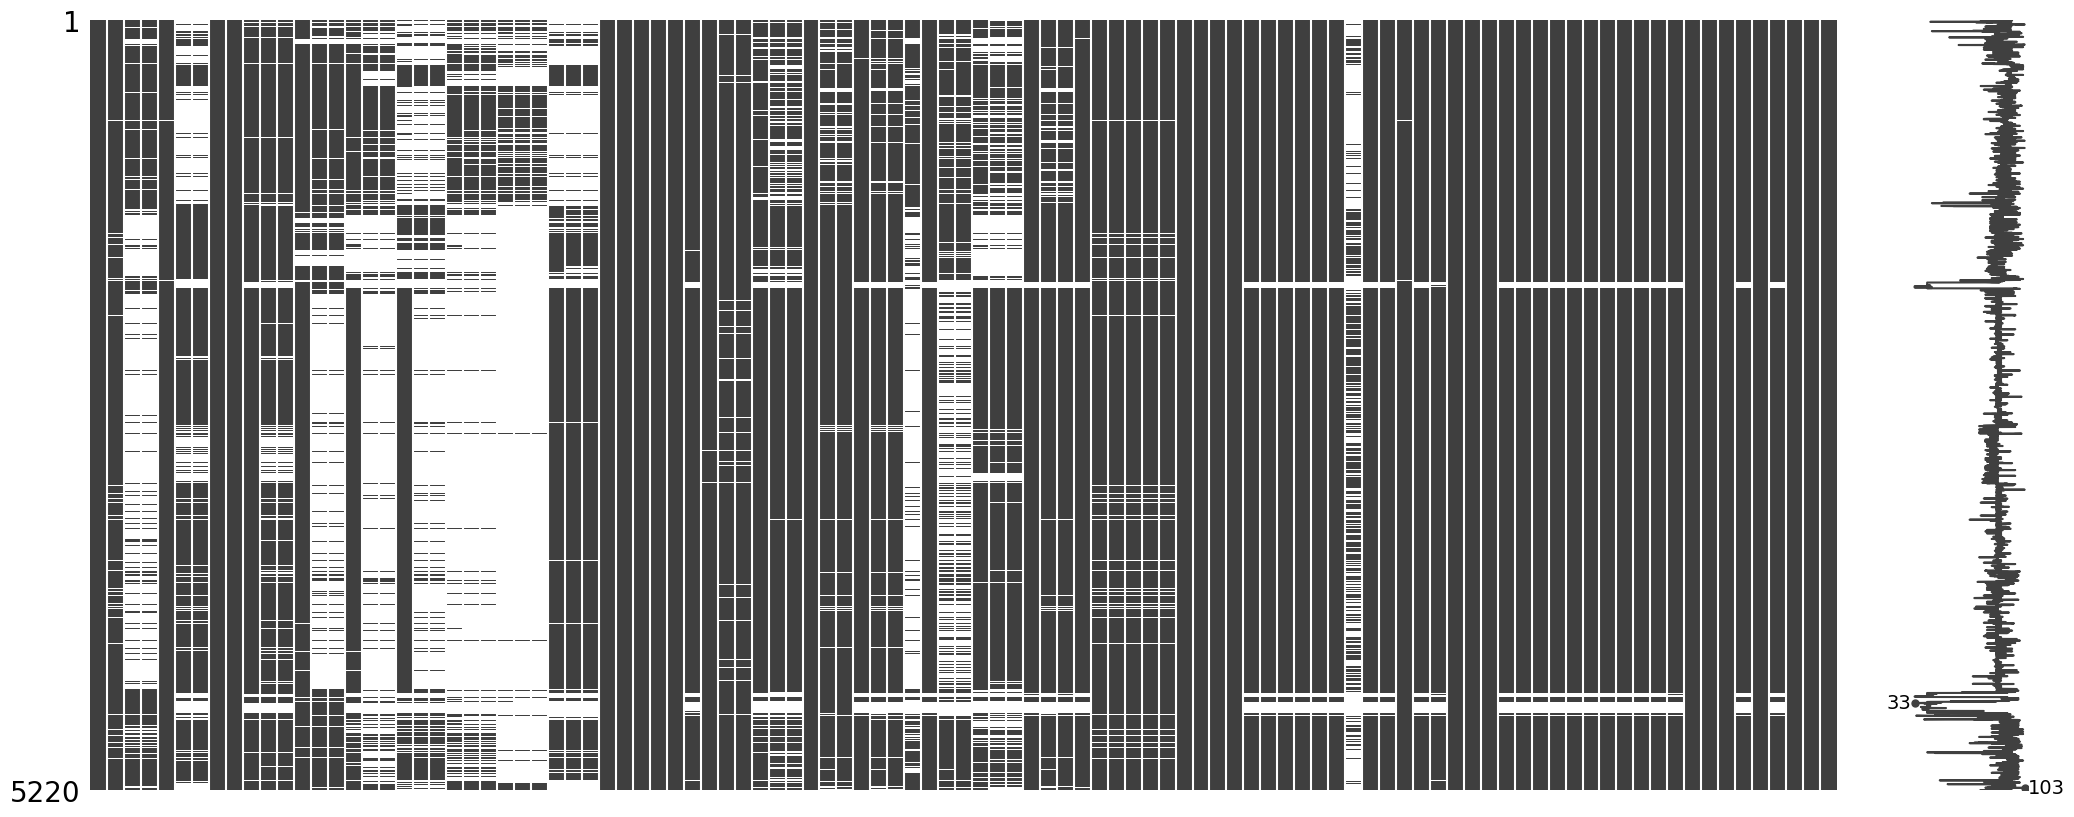

In [8]:
msno.matrix(planets)

(5220, 103)
3002
Visualization of missing values: Top 20 columns with most missing values

Matrix of missing values:


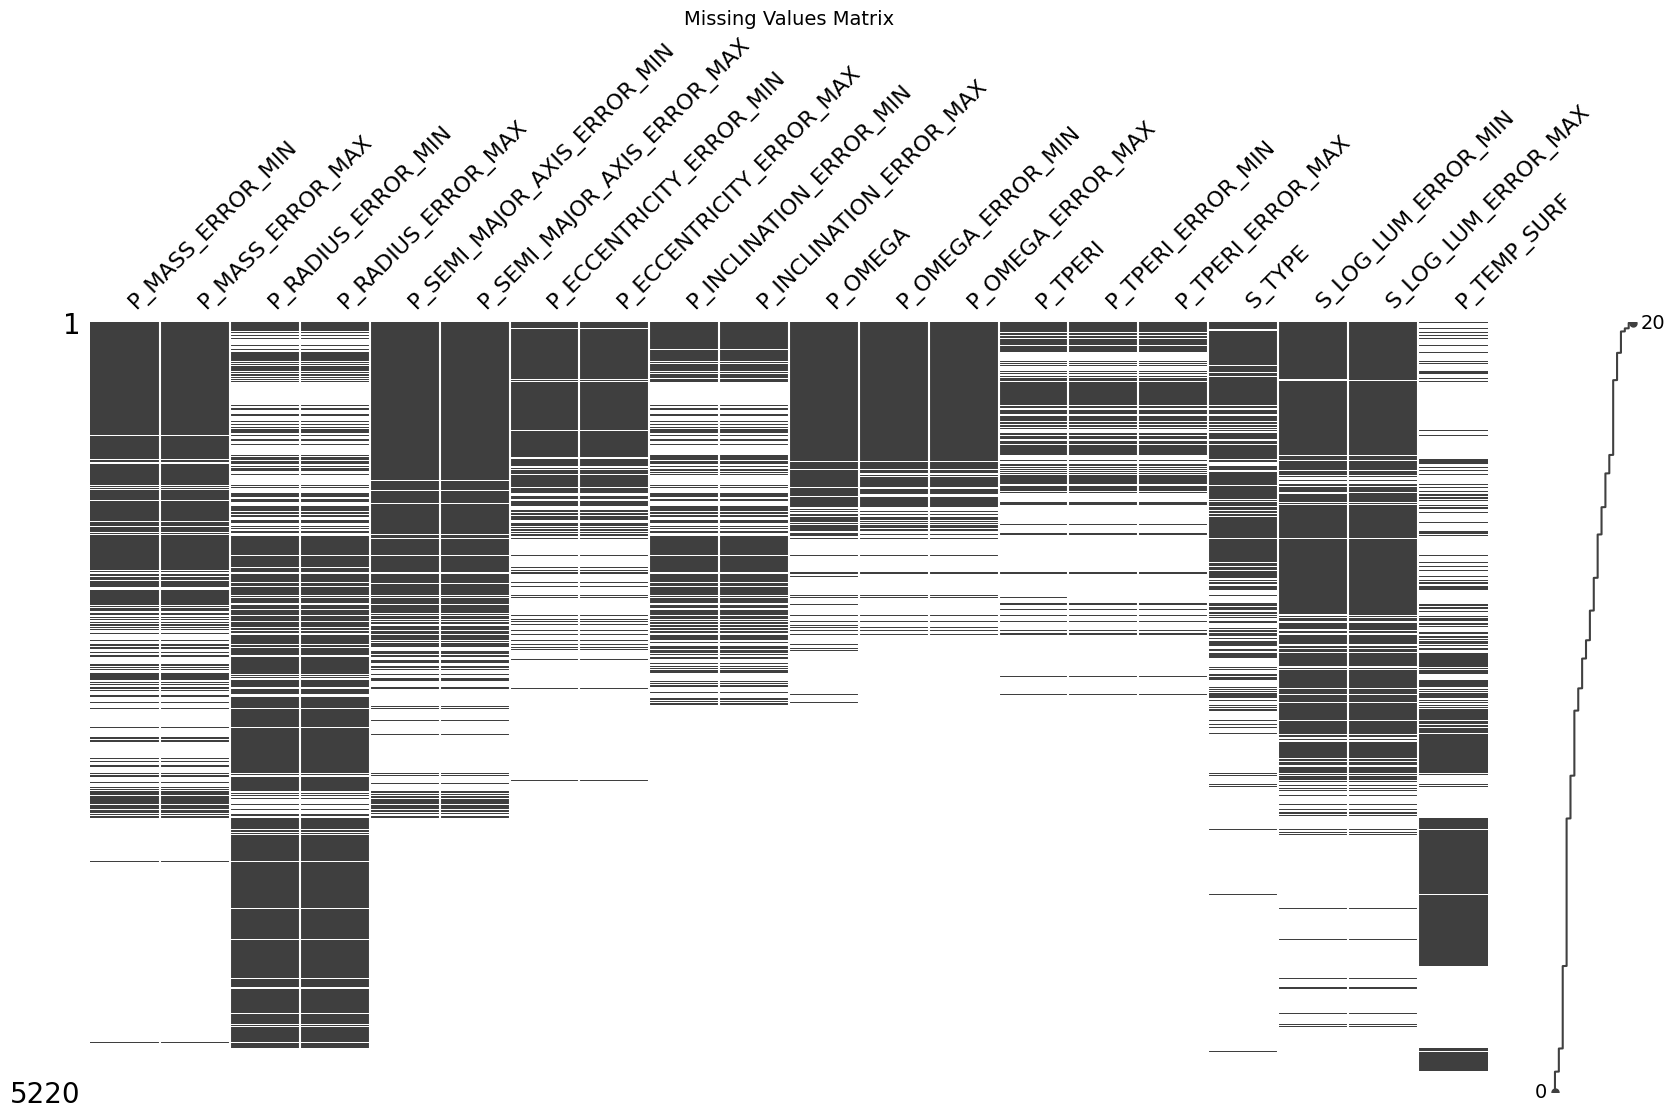

In [9]:
#Missing values representation
print(planets.shape)
print(planets['P_MASS_ERROR_MIN'].isnull().sum())

print("Visualization of missing values: Top 20 columns with most missing values\n")
print("Matrix of missing values:")
msno.matrix(planets, figsize=(20,10), sparkline=True, 
            filter='bottom', sort='descending', n=20)
plt.title('Missing Values Matrix', fontsize=14)
plt.show()

### Handling missing values


(5220, 103)
Columns with ≥40% missing values: 18
------------------------------------------------------------
 1. P_MASS_ERROR_MIN                    | 3002 missing ( 57.5%)
 2. P_MASS_ERROR_MAX                    | 3002 missing ( 57.5%)
 3. P_SEMI_MAJOR_AXIS_ERROR_MIN         | 2828 missing ( 54.2%)
 4. P_SEMI_MAJOR_AXIS_ERROR_MAX         | 2828 missing ( 54.2%)
 5. P_ECCENTRICITY_ERROR_MIN            | 3738 missing ( 71.6%)
 6. P_ECCENTRICITY_ERROR_MAX            | 3738 missing ( 71.6%)
 7. P_INCLINATION_ERROR_MIN             | 3737 missing ( 71.6%)
 8. P_INCLINATION_ERROR_MAX             | 3739 missing ( 71.6%)
 9. P_OMEGA                             | 3721 missing ( 71.3%)
10. P_OMEGA_ERROR_MIN                   | 3842 missing ( 73.6%)
11. P_OMEGA_ERROR_MAX                   | 3842 missing ( 73.6%)
12. P_TPERI                             | 4294 missing ( 82.3%)
13. P_TPERI_ERROR_MIN                   | 4324 missing ( 82.8%)
14. P_TPERI_ERROR_MAX                   | 4324 missing ( 8

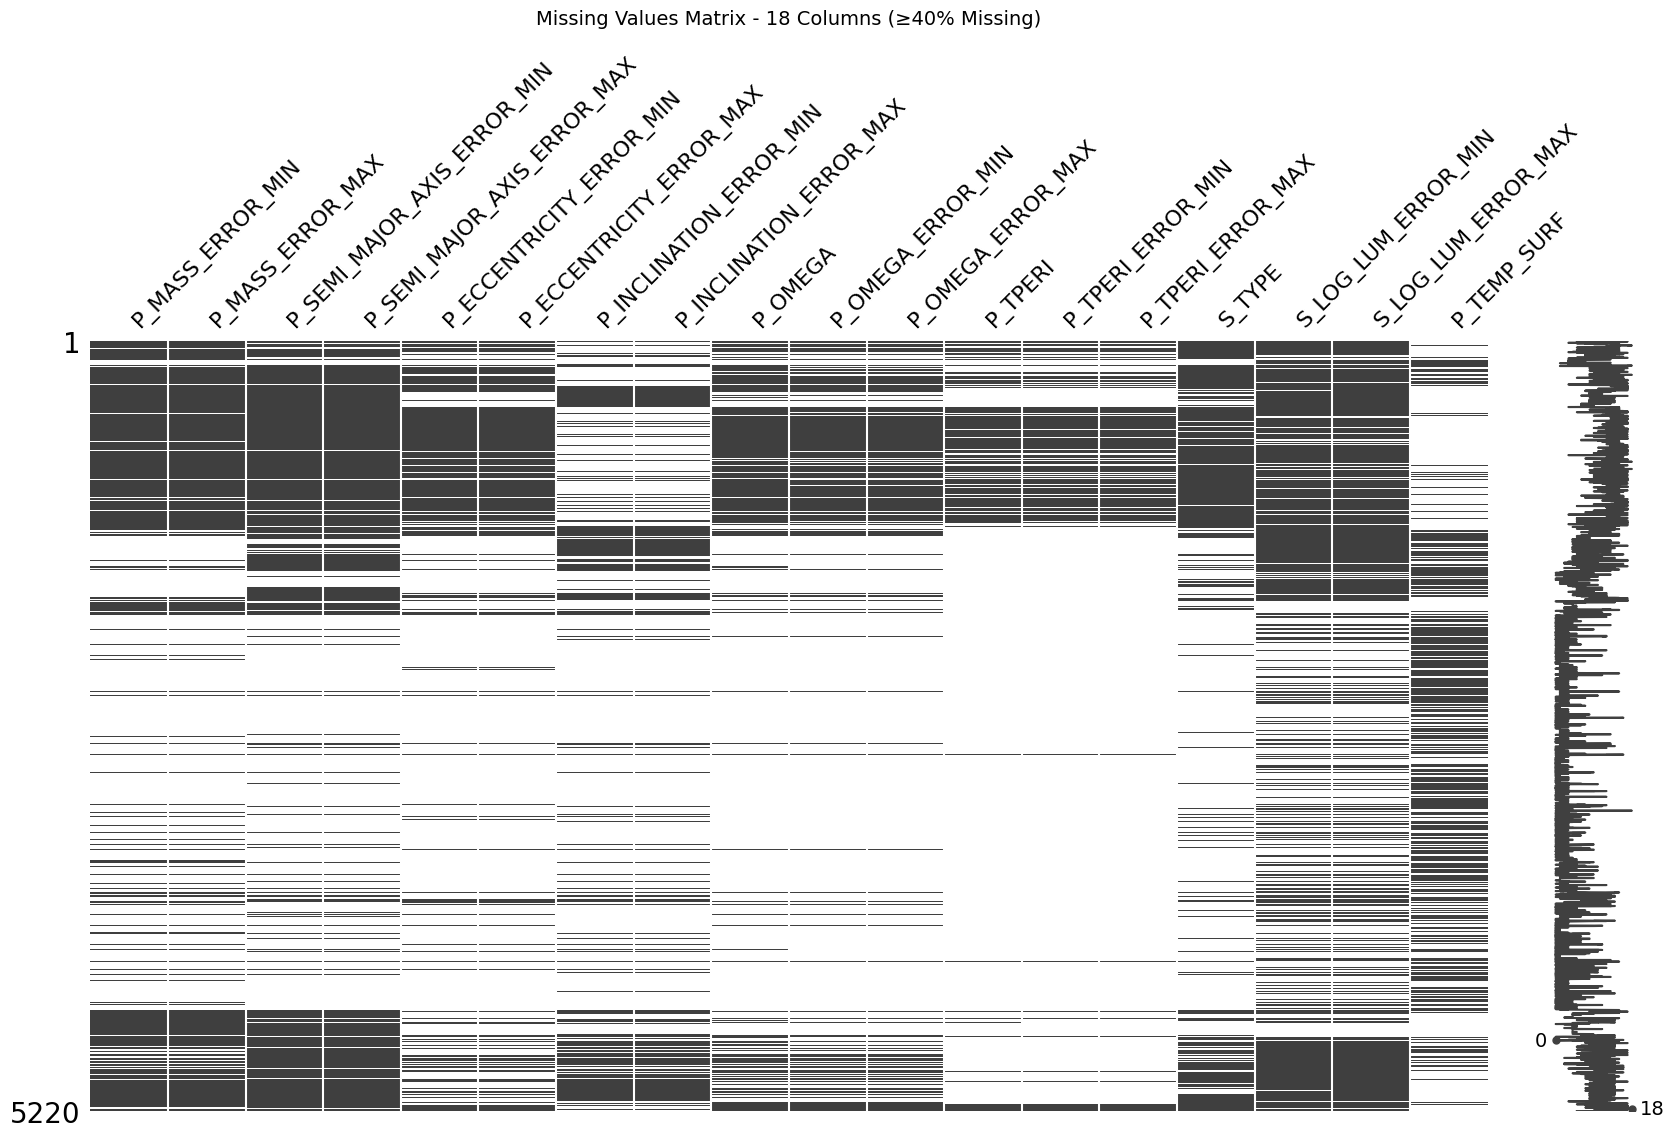

In [10]:
# Finding columns with 40% or more missing values
print(planets.shape)
# Calculate missing percentage per column
missing_percentage = (planets.isnull().mean() * 100)

# Select columns with ≥40% missing values
cols_40_missing = missing_percentage[missing_percentage >= 40].index

if len(cols_40_missing) > 0:
    print(f"Columns with ≥40% missing values: {len(cols_40_missing)}\n" + "-"*60)
    for i, col in enumerate(cols_40_missing, start=1):
        print(f"{i:2d}. {col:<35} | {planets[col].isnull().sum()} missing ({missing_percentage[col]:5.1f}%)")

    # Subset
    subset = planets[cols_40_missing]

    # Matrix view
    msno.matrix(subset, figsize=(20, 10), sparkline=True)
    plt.title(f'Missing Values Matrix - {len(cols_40_missing)} Columns (≥40% Missing)', fontsize=14, pad=20)
    plt.show()

Shape after dropping columns with ≥40% missing values: (5220, 86)


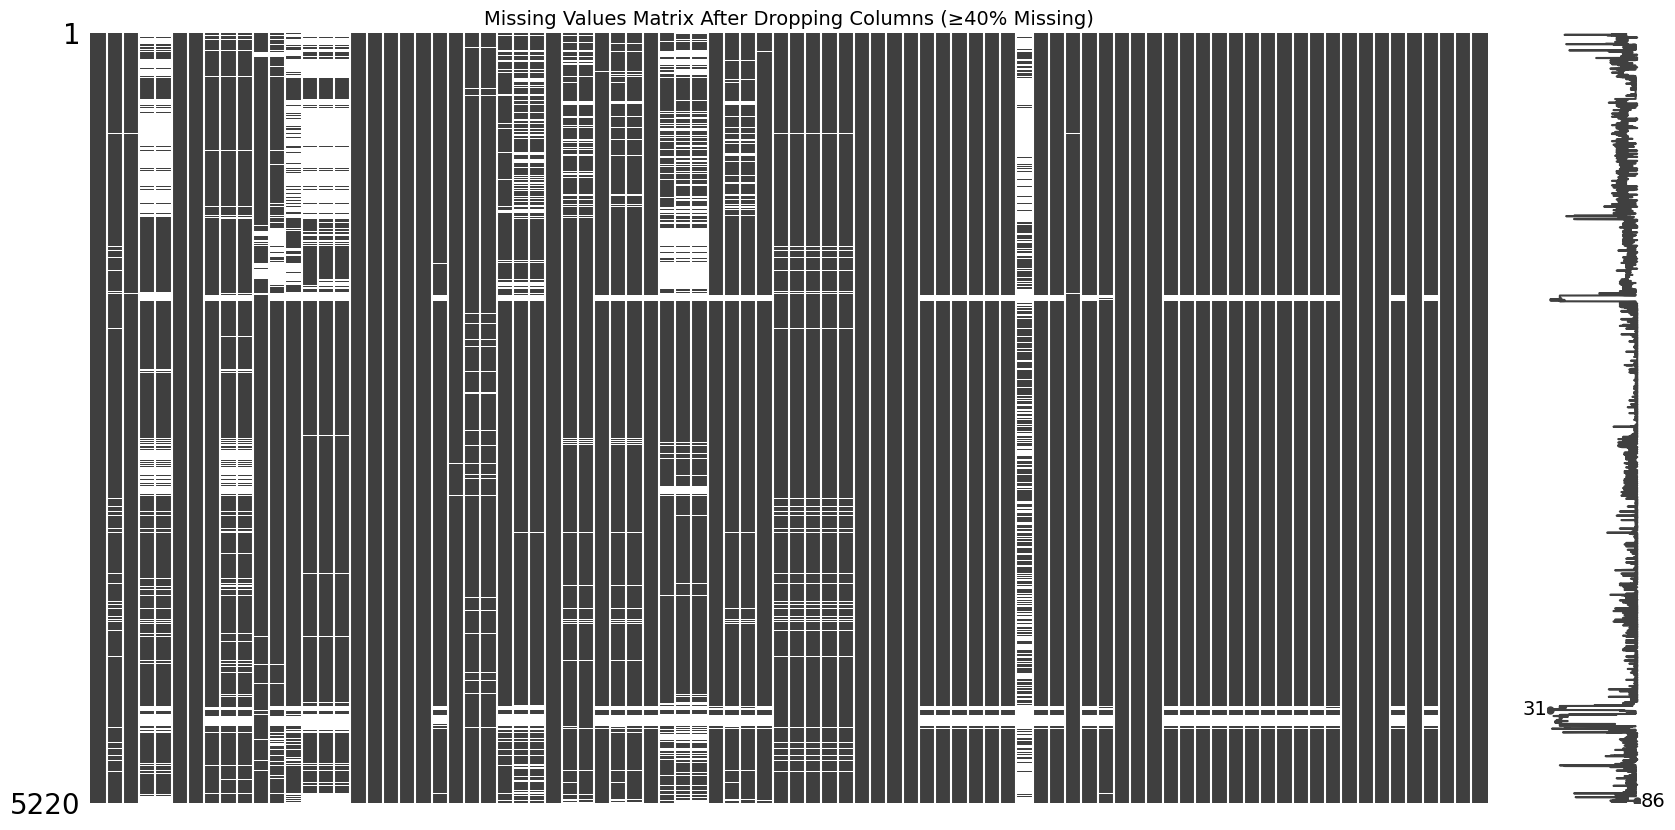

In [11]:
cols_to_drop = [col for col in cols_40_missing if col != "P_TEMP_SURF"]
planets_cleaned = planets.drop(columns=cols_to_drop)
print(f"Shape after dropping columns with ≥40% missing values: {planets_cleaned.shape}")
msno.matrix(planets_cleaned, figsize=(20,10), sparkline=True)
plt.title('Missing Values Matrix After Dropping Columns (≥40% Missing)', fontsize=14)
plt.show()

In [12]:
planets_cleaned=pd.DataFrame(planets_cleaned)
planets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   P_NAME                        5219 non-null   object 
 1   P_MASS                        5085 non-null   float64
 2   P_RADIUS                      5202 non-null   float64
 3   P_RADIUS_ERROR_MIN            3605 non-null   float64
 4   P_RADIUS_ERROR_MAX            3605 non-null   float64
 5   P_YEAR                        5220 non-null   int64  
 6   P_UPDATED                     5219 non-null   object 
 7   P_PERIOD                      5036 non-null   float64
 8   P_PERIOD_ERROR_MIN            4543 non-null   float64
 9   P_PERIOD_ERROR_MAX            4543 non-null   float64
 10  P_SEMI_MAJOR_AXIS             4944 non-null   float64
 11  P_ECCENTRICITY                4544 non-null   float64
 12  P_INCLINATION                 3981 non-null   float64
 13  P_I

##### Handling missing values of Mass and Radius column using Chen and Kipping Relation

Number of missing values in P_MASS: 135
Number of missing values in P_RADIUS: 18


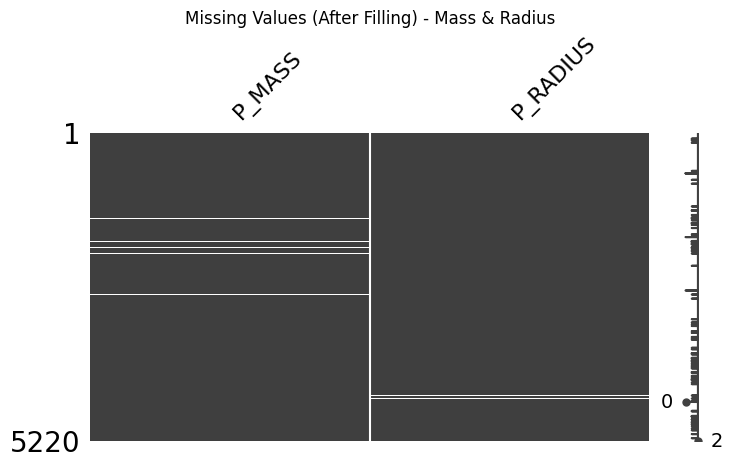

In [13]:
# Filling missing values for P_MASS and P_RADIUS using Chen and Kippings method
print("Number of missing values in P_MASS:", planets['P_MASS'].isnull().sum())
print("Number of missing values in P_RADIUS:", planets['P_RADIUS'].isnull().sum())
msno.matrix(planets_cleaned[['P_MASS', 'P_RADIUS']], figsize=(8,4))
plt.title("Missing Values (After Filling) - Mass & Radius")
plt.show()

In [14]:
def radius_from_mass(M):
    if M < 2.04:  # Terran
        return (10**0.00346) * (M ** 0.279)
    elif 2.04 <= M < 132:  # Neptunian
        return (10**-0.0925) * (M ** 0.589)
    elif 132 <= M <= 26600:  # Jovian
        return (10**1.25) * (M ** -0.044)
    else:  # Stellar
        return (10**-2.85) * (M ** 0.881)


def mass_from_radius(R):
    if R < 1.23:  # Terran
        return (R / (10**0.00346)) ** (1 / 0.279)
    elif 1.23 <= R < 11.1:  # Neptunian (valid range)
        return (R / (10**-0.0925)) ** (1 / 0.589)
    elif 11.1 <= R <= 14.3:
        return np.nan  # Degenerate zone 
    else:
        return (R / (10**-2.85)) ** (1 / 0.881) #Jovian


def fill_mass_radius(df, mass_col="P_MASS", radius_col="P_RADIUS"):
    df = df.copy()
    
    # Fill missing mass
    for idx, row in df.iterrows():
        if pd.isnull(row[mass_col]) and not pd.isnull(row[radius_col]):
            df.at[idx, mass_col] = mass_from_radius(row[radius_col])
    
    # Fill missing radius
    for idx, row in df.iterrows():
        if pd.isnull(row[radius_col]) and not pd.isnull(row[mass_col]):
            df.at[idx, radius_col] = radius_from_mass(row[mass_col])
    
    return df

planets_cleaned = fill_mass_radius(planets_cleaned)


Number of missing values in P_MASS: 31
Number of missing values in P_RADIUS: 9


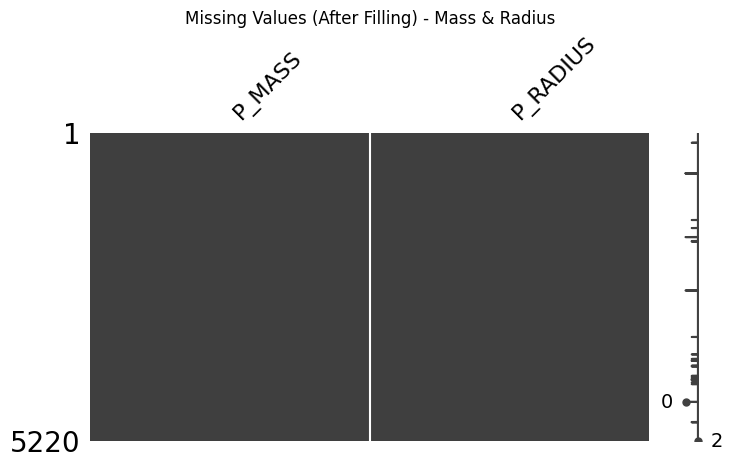

In [15]:
#Missing values after filling the Mass and Radius columns using Chen and Kippings method
print("Number of missing values in P_MASS:", planets_cleaned['P_MASS'].isnull().sum())
print("Number of missing values in P_RADIUS:", planets_cleaned['P_RADIUS'].isnull().sum())
msno.matrix(planets_cleaned[['P_MASS', 'P_RADIUS']], figsize=(8,4))
plt.title("Missing Values (After Filling) - Mass & Radius")
plt.show()

 Handle the remaining missing values of mass and radius using iteravtive imputer

In [16]:
mass_radius_to_impute = ["P_MASS", "P_RADIUS"]
mass_radius_df = planets_cleaned[mass_radius_to_impute]

imp = IterativeImputer(RandomForestRegressor(), max_iter=5, random_state=76)

# 3. Fit & transform only on the selected columns
mass_radius_filled = pd.DataFrame(imp.fit_transform(mass_radius_df), columns=mass_radius_df.columns
)
planets_cleaned[mass_radius_to_impute] = mass_radius_filled

Number of missing values in P_MASS: 0
Number of missing values in P_RADIUS: 0


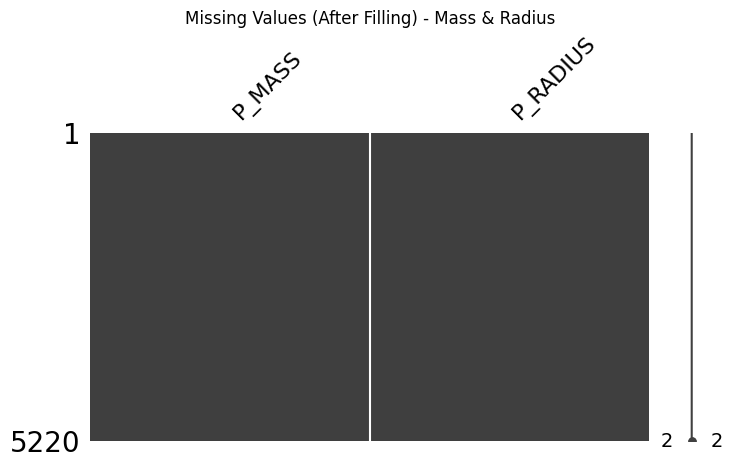

In [17]:
#Missing values after filling the Mass and Radius columns
print("Number of missing values in P_MASS:", planets_cleaned['P_MASS'].isnull().sum())
print("Number of missing values in P_RADIUS:", planets_cleaned['P_RADIUS'].isnull().sum())
msno.matrix(planets_cleaned[['P_MASS', 'P_RADIUS']], figsize=(8,4))
plt.title("Missing Values (After Filling) - Mass & Radius")
plt.show()

#### Handle missing values in Planet Density and Escape velocity columns


In [18]:
print("Number of missing values in P_DENSITY:", planets_cleaned['P_DENSITY'].isnull().sum())
print("Number of missing values in P_ESCAPE:", planets_cleaned['P_ESCAPE'].isnull().sum())

Number of missing values in P_DENSITY: 144
Number of missing values in P_ESCAPE: 144


In [19]:
# Calculate P_DENSITY and P_ESCAPE using the formula
# Density relative to Earth (Earth = 1)
planets_cleaned["P_DENSITY"] = planets_cleaned['P_MASS'] / (planets_cleaned['P_RADIUS'] ** 3)    
# Escape velocity relative to Earth (Earth = 1)
planets_cleaned["P_ESCAPE"] = np.sqrt(planets_cleaned['P_MASS'] / planets_cleaned['P_RADIUS'])

# Handle invalid or missing values
planets_cleaned.loc[planets_cleaned['P_RADIUS'] <= 0, ["P_DENSITY", "P_ESCAPE"]] = np.nan

print("Number of missing values after filling in P_DENSITY:", planets_cleaned['P_DENSITY'].isnull().sum())
print("Number of missing values after filling in P_ESCAPE:", planets_cleaned['P_ESCAPE'].isnull().sum())

Number of missing values after filling in P_DENSITY: 0
Number of missing values after filling in P_ESCAPE: 0


#### Handle missing values in ESI column

In [20]:
#Checking if there are any missing values in P_ESI column
print("Number of missing values in P_ESI:", planets_cleaned['P_ESI'].isnull().sum())

Number of missing values in P_ESI: 168


In [21]:
print("Missing P_Luminosity:", planets_cleaned["S_LUMINOSITY"].isna().sum())
print("Missing S_RADIUS:", planets_cleaned["S_RADIUS"].isna().sum())
print("Missing S_TEMPERATURE:", planets_cleaned["S_TEMPERATURE"].isna().sum())
print("Missing P_HABITABLE:",planets_cleaned["P_HABITABLE"].isna().sum())
print("Missing P_HABZONE_OPT:",planets_cleaned["P_HABZONE_OPT"].isna().sum())
print("Missing P_HABZONE_CON:",planets_cleaned["P_HABZONE_CON"].isna().sum())
print("Missing P_NAME:",planets_cleaned["P_NAME"].isna().sum())
print("Missing P_SEMI_MAJOR_AXIS:", planets_cleaned["P_SEMI_MAJOR_AXIS"].isna().sum())

Missing P_Luminosity: 167
Missing S_RADIUS: 174
Missing S_TEMPERATURE: 153
Missing P_HABITABLE: 0
Missing P_HABZONE_OPT: 0
Missing P_HABZONE_CON: 0
Missing P_NAME: 1
Missing P_SEMI_MAJOR_AXIS: 276


In [22]:
cols_impute = ["S_RADIUS", "S_TEMPERATURE","P_SEMI_MAJOR_AXIS"]
cols_df = planets_cleaned[cols_impute]

imp = IterativeImputer(RandomForestRegressor(), max_iter=5, random_state=76)

# 3. Fit & transform only on the selected columns
cols_filled = pd.DataFrame(imp.fit_transform(cols_df), columns=cols_df.columns
)
planets_cleaned[cols_impute] = cols_filled


c:\Users\Meghana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [23]:
print("Missing S_RADIUS:", planets_cleaned["S_RADIUS"].isna().sum())
print("Missing S_TEMPERATURE:", planets_cleaned["S_TEMPERATURE"].isna().sum())
print("Missing P_SEMI_MAJOR_AXIS:", planets_cleaned["P_SEMI_MAJOR_AXIS"].isna().sum())

Missing S_RADIUS: 0
Missing S_TEMPERATURE: 0
Missing P_SEMI_MAJOR_AXIS: 0


In [24]:
# Calculate S_LUMINOSITY using the Stefan-Boltzmann law
print("Number of missing values before filling in S_LUMINOSITY:", planets_cleaned['S_LUMINOSITY'].isnull().sum())
for i, row in planets_cleaned.iterrows():
    # Fill only if luminosity is missing but radius AND temperature are available
    if pd.isna(row["S_LUMINOSITY"]):
        if not pd.isna(row["S_RADIUS"]) and not pd.isna(row["S_TEMPERATURE"]):
            planets_cleaned.at[i, "S_LUMINOSITY"] = (row["S_RADIUS"] ** 2) * ((row["S_TEMPERATURE"] / 5772) ** 4)

print("Number of missing values after filling in S_LUMINOSITY:", planets_cleaned['S_LUMINOSITY'].isnull().sum())

Number of missing values before filling in S_LUMINOSITY: 167
Number of missing values after filling in S_LUMINOSITY: 0


In [25]:
# Calculate and fill missing P_FLUX using luminosity and semi-major axis
print("Missing P_FLUX before filling:", planets_cleaned['P_FLUX'].isna().sum())

for i, row in planets_cleaned.iterrows():
    if pd.isna(row["P_FLUX"]):  # only fill missing values
        if not pd.isna(row["S_LUMINOSITY"]) and not pd.isna(row["P_SEMI_MAJOR_AXIS"]):
            planets_cleaned.at[i, "P_FLUX"] = row["S_LUMINOSITY"] / (row["P_SEMI_MAJOR_AXIS"] ** 2)

print("Missing P_FLUX after filling:", planets_cleaned['P_FLUX'].isna().sum())

Missing P_FLUX before filling: 168
Missing P_FLUX after filling: 0


In [26]:
#Drop the row where P_NAME is null
planets_cleaned.dropna(subset=['P_NAME'], inplace=True)
print("Missing value p_name",planets_cleaned['P_NAME'].isna().sum())

Missing value p_name 0


In [27]:
"""Compute Earth Similarity Index (ESI)"""
print("Missing ESI before filling:", planets_cleaned['P_ESI'].isna().sum())
def compute_esi(flux, radius):
    if pd.isna(flux) or pd.isna(radius):
        return np.nan
    
    if flux <= 0 or radius <= 0:
        return np.nan
    
    term_flux = (flux - 1) / (flux + 1)
    term_radius = (radius - 1) / (radius + 1)
    
    esi = 1 - np.sqrt(0.5 * (term_flux**2 + term_radius**2))
    
    return round(esi, 9)
# Fill missing ESI values
for i, row in planets_cleaned.iterrows():
    if pd.isna(row["P_ESI"]) and not pd.isna(row["P_FLUX"]) and not pd.isna(row["P_RADIUS"]):
        planets_cleaned.at[i, "P_ESI"] = compute_esi(row["P_FLUX"], row["P_RADIUS"])
print("Missing ESI after filling:", planets_cleaned['P_ESI'].isna().sum())

Missing ESI before filling: 168
Missing ESI after filling: 0


#### Drop Unwated columns

In [28]:
cols_to_drop = [ "P_MASS_ERROR_MIN", "P_MASS_ERROR_MAX", "P_RADIUS_ERROR_MIN", "P_RADIUS_ERROR_MAX",
    "P_YEAR", "P_UPDATED", "P_PERIOD", "P_PERIOD_ERROR_MIN", "P_PERIOD_ERROR_MAX",
    "P_SEMI_MAJOR_AXIS_ERROR_MIN", "P_SEMI_MAJOR_AXIS_ERROR_MAX", "P_ECCENTRICITY_ERROR_MIN",
    "P_ECCENTRICITY_ERROR_MAX", "P_INCLINATION", "P_INCLINATION_ERROR_MIN",
    "P_INCLINATION_ERROR_MAX", "P_OMEGA", "P_TPERI", "P_DETECTION_MASS",
    "S_RA", "S_DEC", "S_MAG", "S_DISTANCE_ERROR_MIN", "S_DISTANCE_ERROR_MAX",
    "S_METALLICITY", "S_METALLICITY_ERROR_MIN", "S_METALLICITY_ERROR_MAX", "S_TYPE",
    "S_LOG_LUM", "S_LOG_LUM_ERROR_MIN", "S_LOG_LUM_ERROR_MAX", "S_TEMPERATURE_ERROR_MIN", "S_TEMPERATURE_ERROR_MAX", "S_LOG_G",
    "P_HILL_SPHERE", "P_PERIASTRON", "P_APASTRON", "P_DISTANCE_EFF", "P_TEMP_EQUIL_MIN",
    "P_TEMP_EQUIL_MAX", "P_TEMP_SURF_MIN", "P_TEMP_SURF_MAX", "S_RA_H",
    "S_RA_T", "S_DEC_T", "S_CONSTELLATION", "S_CONSTELLATION_ABR", "S_CONSTELLATION_ENG"
]

planets_cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')

#### Fill the remaining missing values using Iterative Imputation

In [29]:
numeric_values = planets_cleaned[planets_cleaned._get_numeric_data().columns]
numeric_values

,P_MASS,P_RADIUS,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,S_DISTANCE,S_MASS,S_MASS_ERROR_MIN,...,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI
0,6165.86330,12.1068,1.290000,0.231000,NaN,NaN,NaN,93.1846,2.70,-0.30,...,24.285013,12.816600,24.285013,35.716079,0.476460,0.642400,0,0,0,0.083004
1,4684.78480,12.2189,1.530000,0.080000,NaN,NaN,NaN,125.3210,2.78,-0.69,...,31.432986,16.186398,31.432986,44.295925,0.193891,0.541702,0,0,0,0.081792
2,1525.57440,12.8915,0.830000,0.000000,NaN,NaN,NaN,75.4392,2.20,-0.20,...,13.890215,7.353056,13.890215,20.552458,0.502752,0.597816,0,0,0,0.081758
3,2586.74170,12.5552,2.773069,0.372689,NaN,NaN,NaN,17.9323,0.91,-0.11,...,1.461158,0.789246,1.461158,2.263934,0.923150,0.434927,0,0,0,0.163310
4,565.73385,13.4520,1.660000,0.680000,NaN,NaN,NaN,21.1397,1.08,-0.04,...,1.878911,1.027723,1.878911,3.019005,1.983658,0.512355,1,1,0,0.368405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,6547.25690,12.1068,1.170000,0.031000,NaN,NaN,NaN,112.5370,2.30,-0.30,...,34.354304,17.840553,34.354304,49.075391,0.245861,0.488121,0,0,0,0.077593
5215,218.53853,14.0125,0.059222,0.021500,NaN,NaN,NaN,13.4054,1.30,NaN,...,2.971688,1.641000,2.971688,4.941557,4.244291,0.510545,0,0,0,0.065354
5216,4443.23550,12.3310,0.827774,0.259600,NaN,NaN,NaN,13.4054,1.30,NaN,...,2.971688,1.641000,2.971688,4.941557,4.244291,0.510545,0,0,0,0.234670
5217,3257.73700,12.4431,2.513290,0.298700,NaN,NaN,NaN,13.4054,1.30,NaN,...,2.971688,1.641000,2.971688,4.941557,4.244291,0.510545,1,1,0,0.365111


In [30]:
imp = IterativeImputer(RandomForestRegressor(), max_iter=5, random_state=76)

In [31]:
numeric_values = pd.DataFrame(imp.fit_transform(numeric_values), columns=numeric_values.columns)
numeric_values.to_csv("imputed_planet_data.csv", index=False) 

c:\Users\Meghana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

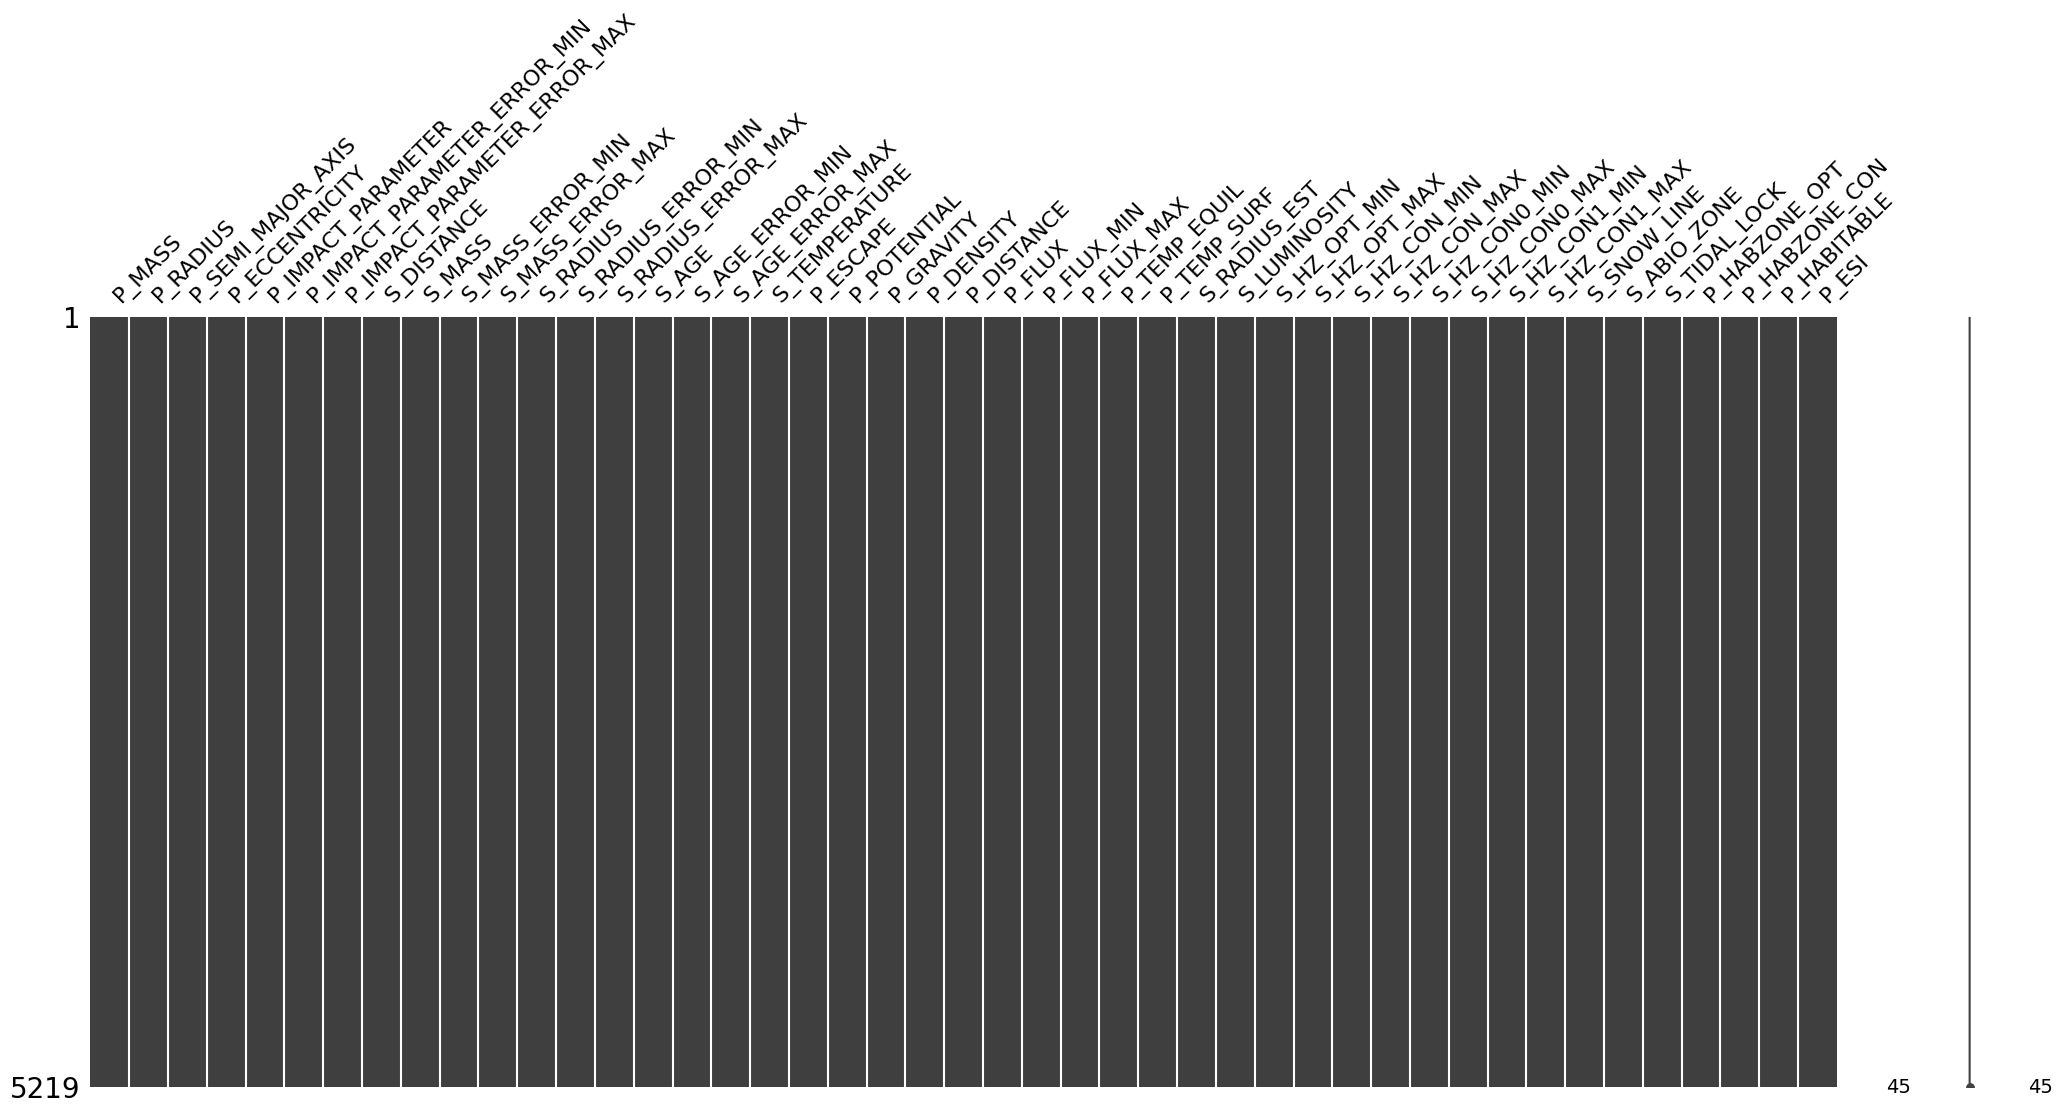

In [32]:
msno.matrix(numeric_values)

In [33]:
imputed_numerics = pd.read_csv('imputed_planet_data.csv')

# merge imputed data with the planets dataframe
for i in imputed_numerics.columns:
    if i not in planets.columns:
        pass
    else:
        planets_cleaned[i] = imputed_numerics[i]

In [6]:
planets_cleaned=pd.read_csv("imputed_planet_data.csv")
planets_cleaned.isnull().sum()

P_MASS                          0
P_RADIUS                        0
P_SEMI_MAJOR_AXIS               0
P_ECCENTRICITY                  0
P_IMPACT_PARAMETER              0
P_IMPACT_PARAMETER_ERROR_MIN    0
P_IMPACT_PARAMETER_ERROR_MAX    0
S_DISTANCE                      0
S_MASS                          0
S_MASS_ERROR_MIN                0
S_MASS_ERROR_MAX                0
S_RADIUS                        0
S_RADIUS_ERROR_MIN              0
S_RADIUS_ERROR_MAX              0
S_AGE                           0
S_TEMPERATURE                   0
P_ESCAPE                        0
P_POTENTIAL                     0
P_GRAVITY                       0
P_DENSITY                       0
P_DISTANCE                      0
P_FLUX                          0
P_FLUX_MIN                      0
P_FLUX_MAX                      0
P_TEMP_EQUIL                    0
S_RADIUS_EST                    0
S_LUMINOSITY                    0
S_HZ_OPT_MIN                    0
S_HZ_OPT_MAX                    0
S_HZ_CON_MIN  

## Feature Engineering

In [34]:
planets_cleaned.columns

Index(['P_NAME', 'P_MASS', 'P_RADIUS', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY',
       'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN',
       'P_IMPACT_PARAMETER_ERROR_MAX', 'P_DETECTION', 'S_NAME', 'S_DISTANCE',
       'S_MASS', 'S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX', 'S_RADIUS',
       'S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX', 'S_AGE', 'S_AGE_ERROR_MIN',
       'S_AGE_ERROR_MAX', 'S_TEMPERATURE', 'P_ESCAPE', 'P_POTENTIAL',
       'P_GRAVITY', 'P_DENSITY', 'P_DISTANCE', 'P_FLUX', 'P_FLUX_MIN',
       'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_SURF', 'P_TYPE', 'S_RADIUS_EST',
       'S_TYPE_TEMP', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX',
       'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX',
       'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE',
       'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP',
       'P_HABITABLE', 'P_ESI'],
      dtype='object')

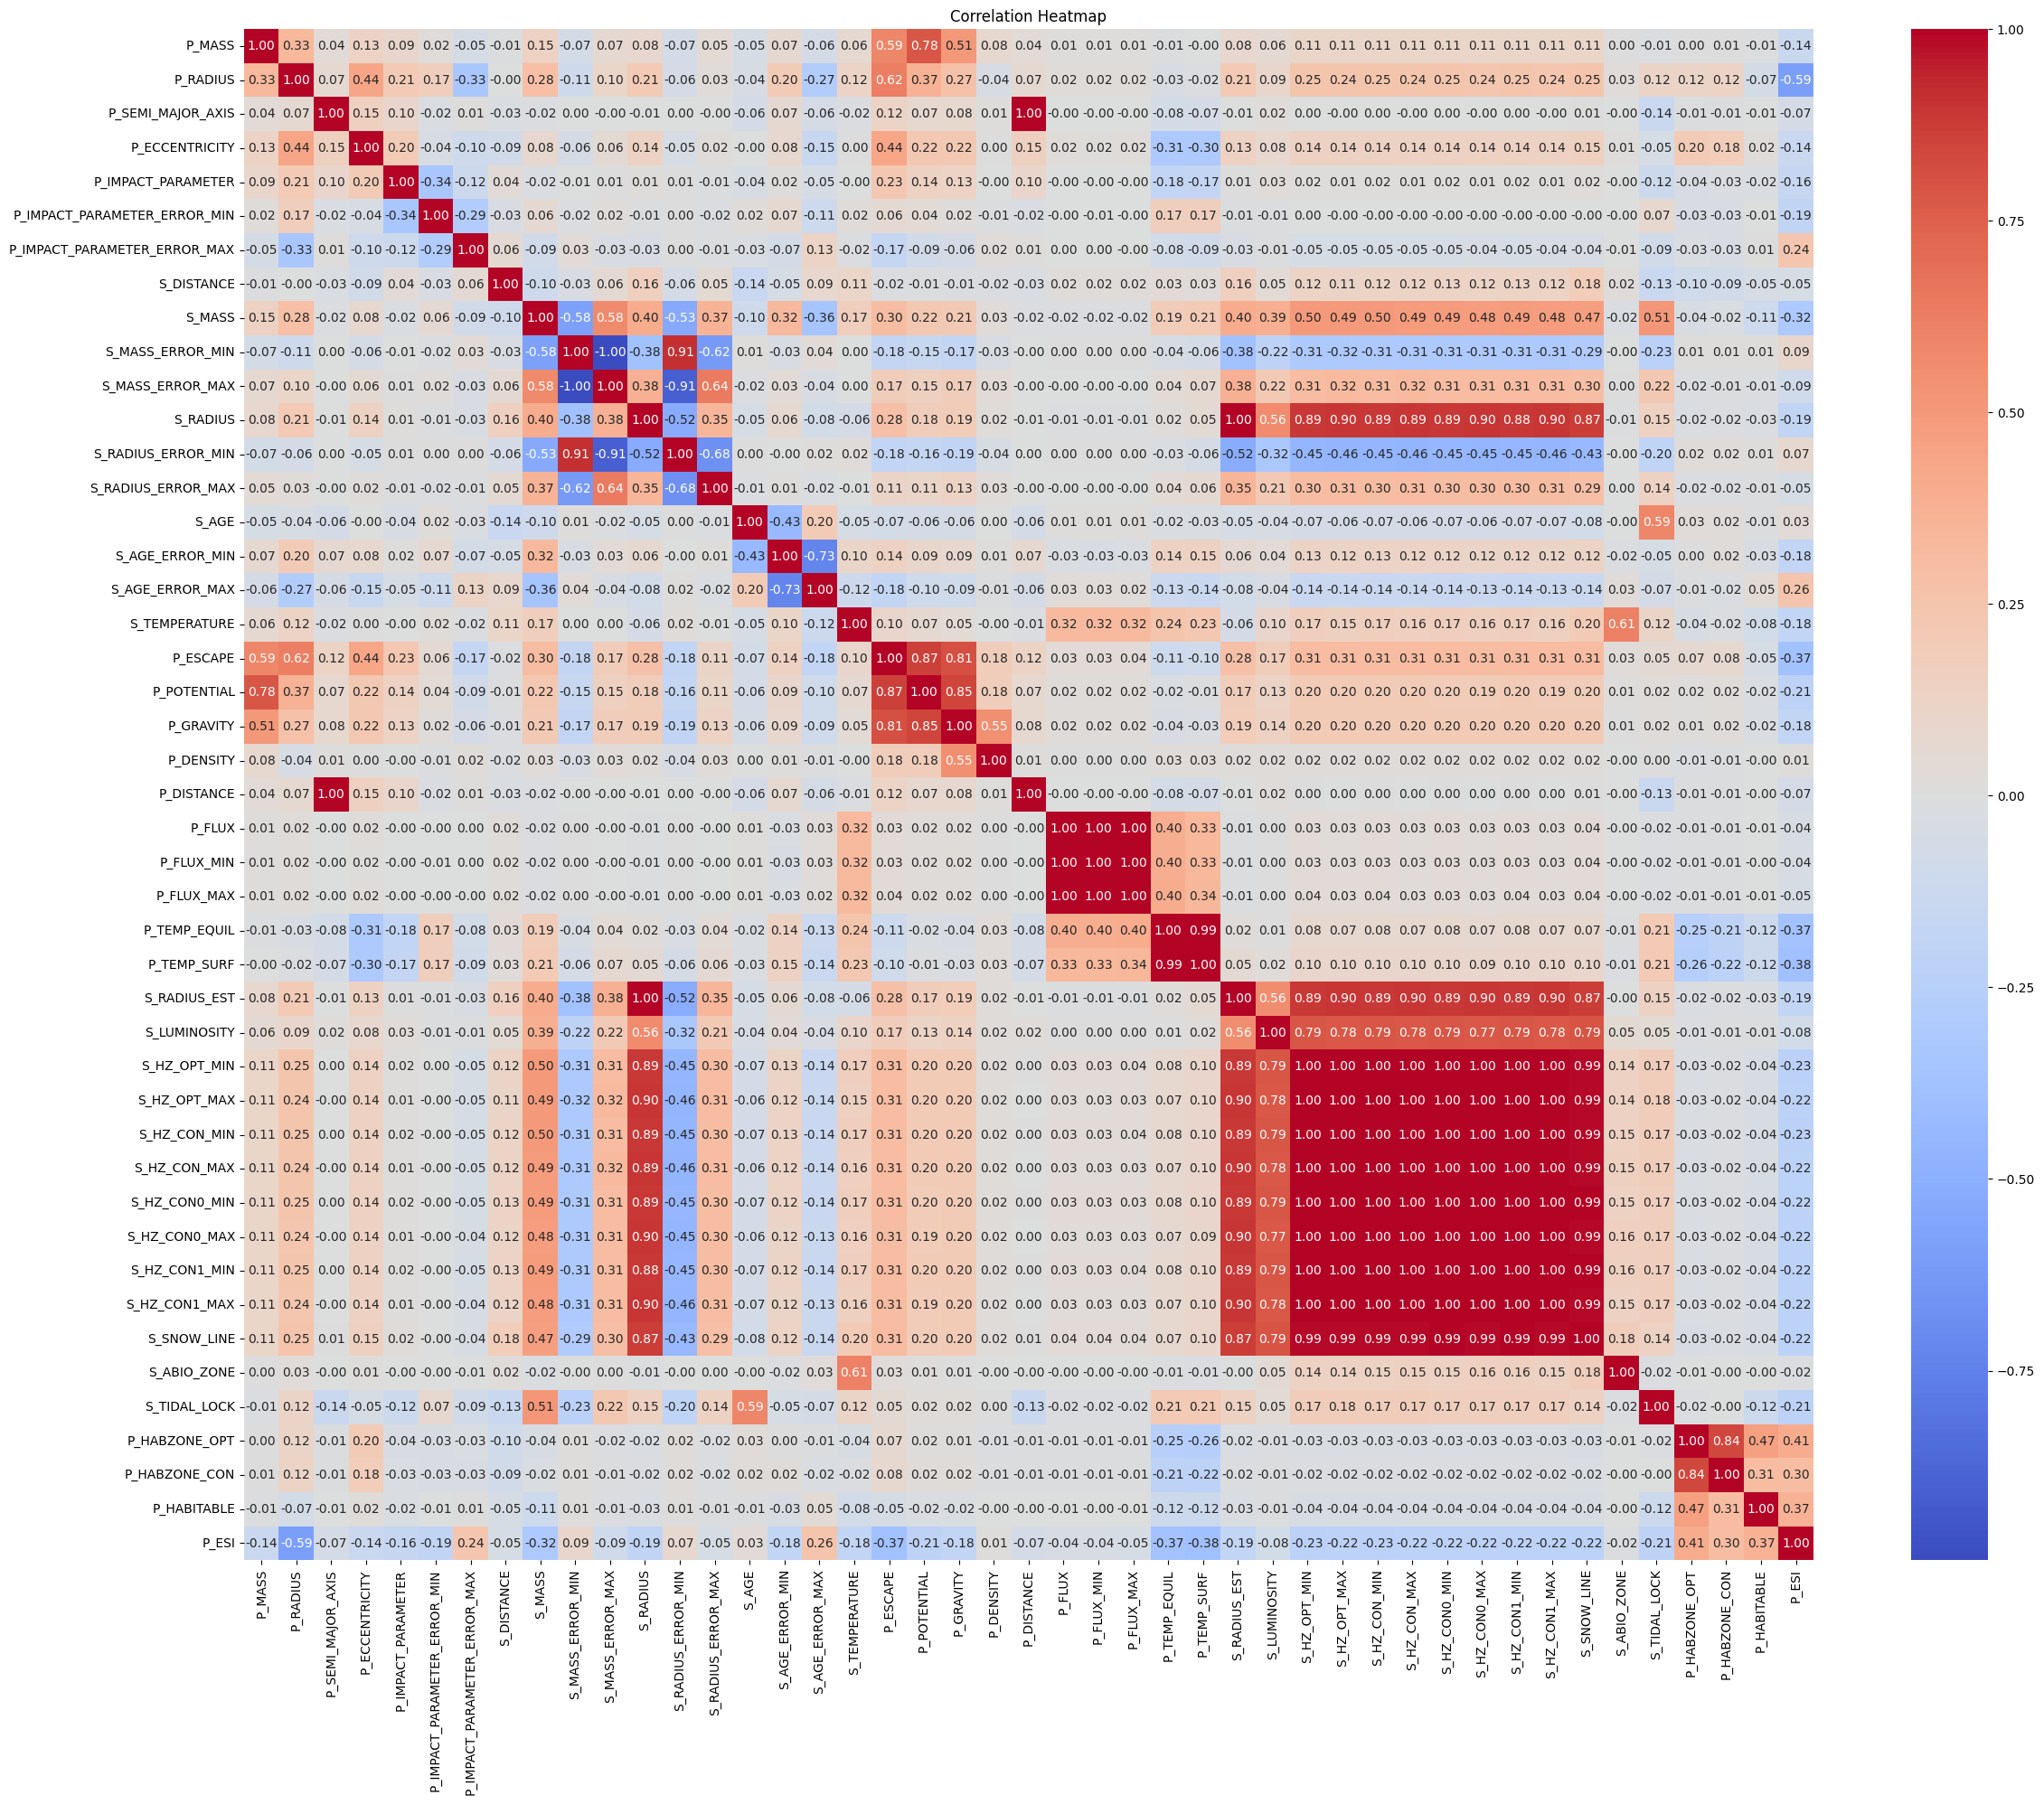

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 22))
numeric_values = planets_cleaned.select_dtypes(include=[np.number])
sns.heatmap(numeric_values.corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [38]:
cols_to_drop=['P_IMPACT_PARAMETER_ERROR_MIN',
       'P_IMPACT_PARAMETER_ERROR_MAX','P_FLUX_MIN', 'P_FLUX_MAX','S_HZ_OPT_MIN',
       'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN','P_TEMP_EQUIL'
       'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE','S_RADIUS_ERROR_MIN', 'S_RADIUS_ERROR_MAX','S_MASS_ERROR_MIN', 'S_MASS_ERROR_MAX','S_RADIUS_EST']
planets_cleaned.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [39]:
planets_cleaned.columns

Index(['P_NAME', 'P_MASS', 'P_RADIUS', 'P_SEMI_MAJOR_AXIS', 'P_ECCENTRICITY',
       'P_IMPACT_PARAMETER', 'P_DETECTION', 'S_NAME', 'S_DISTANCE', 'S_MASS',
       'S_RADIUS', 'S_AGE', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX',
       'S_TEMPERATURE', 'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_DENSITY',
       'P_DISTANCE', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TEMP_SURF', 'P_TYPE',
       'S_TYPE_TEMP', 'S_LUMINOSITY', 'S_HZ_CON0_MAX', 'S_ABIO_ZONE',
       'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_HABZONE_CON', 'P_TYPE_TEMP',
       'P_HABITABLE', 'P_ESI'],
      dtype='object')

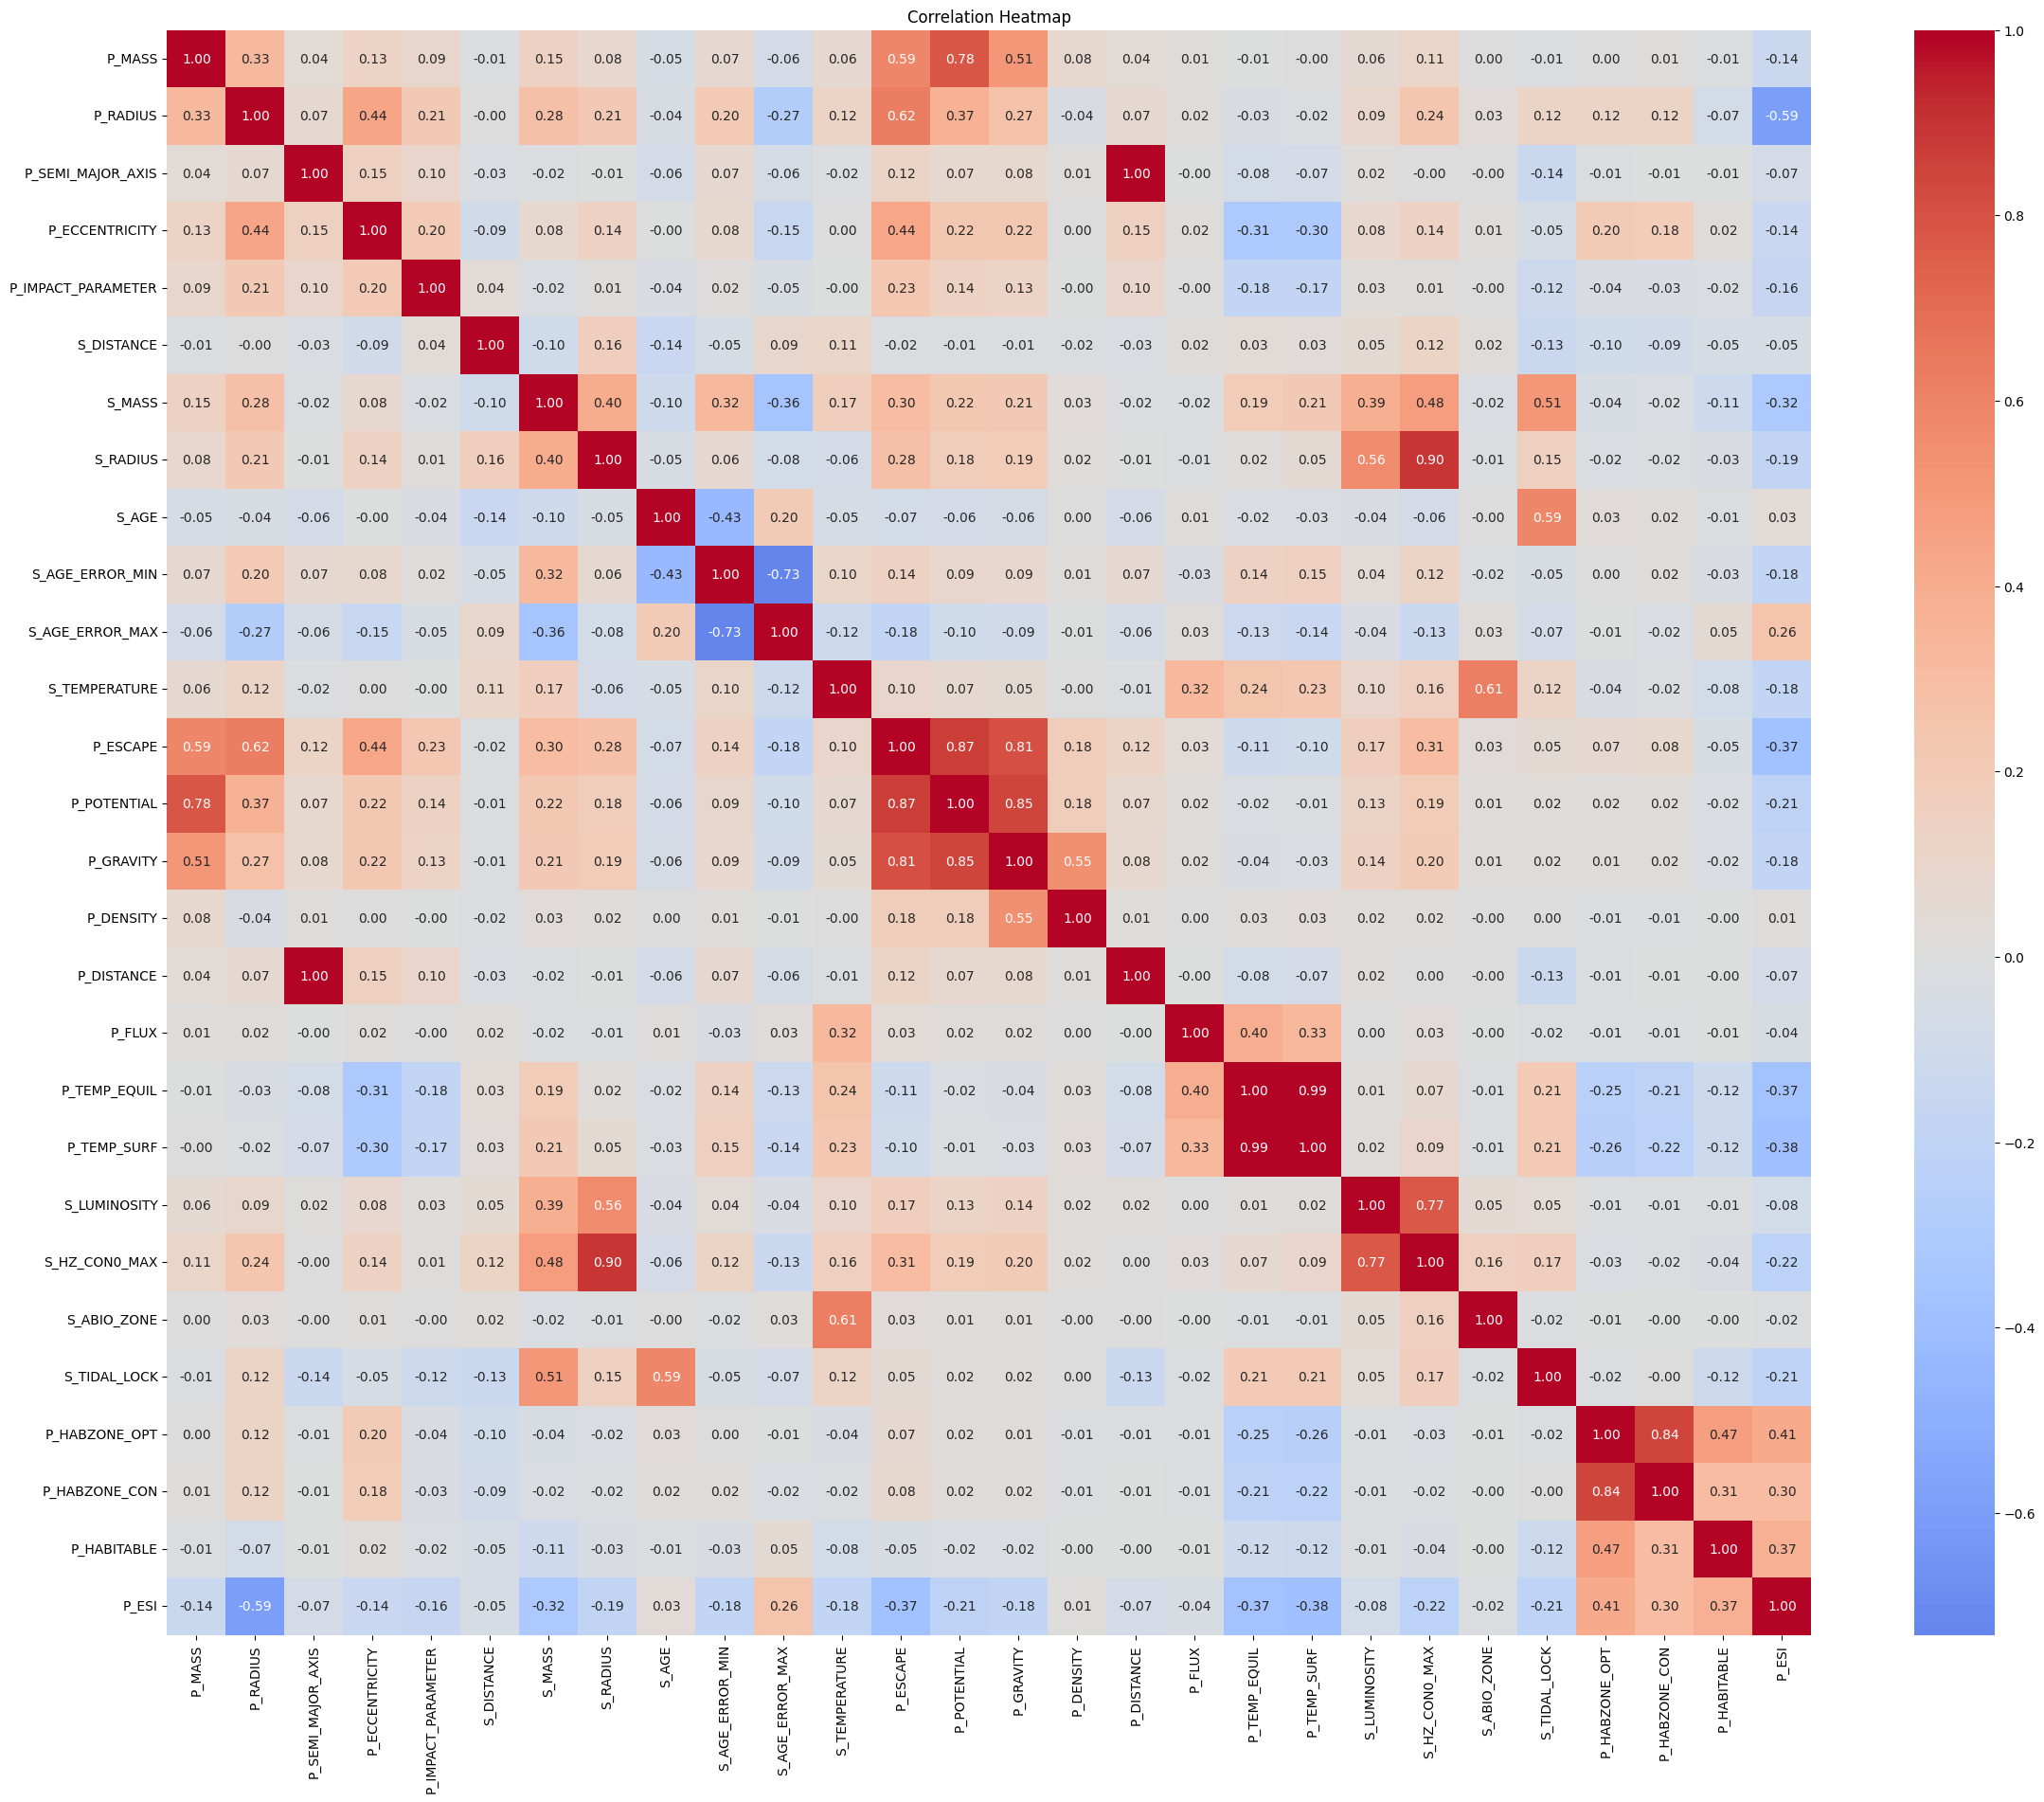

In [40]:
plt.figure(figsize=(28, 22))
numeric_values = planets_cleaned.select_dtypes(include=[np.number])
sns.heatmap(numeric_values.corr(), cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()